In [1]:
from PIL import Image
import numpy as np
from tensorflow.python.keras.models import load_model

In [2]:
classes = ['skunk','fox','rodent','dog','squirrel','cat','rabbit','bird','cow','bobcat','deer','raccoon','coyote','opossum','other']
classes_dict_lookup = dict(zip(range(15), classes))

In [3]:
model = load_model('edge/model/combined_model.h5')

In [4]:
def load_image(path):
    img = Image.open(path)
    img = img.resize(size=(299,299), resample=Image.LANCZOS).convert("RGB")
    img = np.array(img)
    img = img / 255.0
    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    return img

In [8]:
Image.open('/crow/download.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/crow/download.jpg'

In [6]:
#predicted_id = model.predict(load_image('data/cct_images/59439fd8-23d2-11e8-a6a3-ec086b02610b.jpg').reshape(1, 299, 299, 3))
predicted_id = model.predict(load_image('download.jpg').reshape(1, 299, 299, 3))
predicted_name = classes_dict_lookup[predicted_id.argmax()]
predicted_name

FileNotFoundError: [Errno 2] No such file or directory: 'download.jpg'

In [10]:
predicted_id

array([[4.1608334e-16, 6.1869932e-13, 1.1558397e-17, 2.6659878e-08,
        1.8537663e-11, 2.9166957e-11, 2.6647168e-08, 5.7530478e-09,
        5.5706734e-10, 3.9642853e-09, 9.9999940e-01, 2.7073899e-10,
        2.7802943e-07, 1.0279425e-10, 3.4708441e-07]], dtype=float32)

In [3]:
img_array = load_image('Siberian_roe_deer.jpg').reshape(1, 299, 299, 3)

In [4]:
img_array.shape

(1, 299, 299, 3)

In [ ]:
im = Image.fromarray(img_array)
im.save("your_file.jpeg")

# Tensorflow Lite and Quantization

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [21]:
#tf.saved_model.save(model,'edge/model/')
#converter = tf.lite.TFLiteConverter.from_saved_model('edge/model/')

INFO:tensorflow:Assets written to: edge/model/assets


In [10]:
#open("edge/model/converted_model.tflite", "wb").write(tflite_model)

89227712

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
open("edge/model/converted_quant_model.tflite", "wb").write(tflite_quant_model)

22393728

# Run Inference on TF Lite Model

In [3]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="edge/model/converted_quant_model.tflite")
interpreter.allocate_tensors()

In [14]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
input_details[0]

{'name': 'input_17',
 'index': 1,
 'shape': array([  1, 299, 299,   3], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0)}

In [16]:
input_data = img_array.astype(np.float32)

In [17]:
# Test model on random input data.
#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

In [18]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
predictions = interpreter.get_tensor(output_details[0]['index'])
print(predictions)

[[1.7996434e-16 1.5633627e-13 4.1054564e-19 6.2364132e-09 4.8039034e-12
  1.0180091e-11 7.3228819e-09 1.2886735e-09 2.8510355e-10 2.7699304e-10
  9.9999976e-01 5.6435346e-11 6.2987461e-08 2.2626739e-11 6.7611658e-08]]


In [19]:
classes_dict_lookup[predictions.argmax()]

'deer'

### Try inference

In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
def load_model():
    """Here lies logic to load the model"""
    # load model from h5 file
    
    model = tf.lite.Interpreter(model_path="edge/model/converted_quant_model.tflite")
    model.allocate_tensors()
#    input_details = model.get_input_details()
#    output_details = model.get_output_details()
    
    # Test model on random input data.
#    input_shape = input_details[0]['shape']
#    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
#    model.set_tensor(input_details[0]['index'], input_data)

#    model.invoke()

    return model

In [15]:
def infer(model, image):
    """Here is the code that to perform inference using the model.
    Expect this to be the model you return in `load_model()`

    Args:
        model: one built using load_model
        image: numpy array as created by opencv

    Returns: bool, list(string)
        - a boolean to signal we found something
        - name of identified animals
    """
    
    classes = ['skunk','fox','rodent','dog','squirrel','cat','rabbit','bird','cow','bobcat','deer','raccoon','coyote','opossum']
    classes_dict_lookup = dict(zip(range(15), classes+['other']))
    
    # run inference
    model.set_tensor(1, image)
    model.invoke()
    
    predicted_id = model.get_tensor(0)
    predicted_name = classes_dict_lookup[predicted_id.argmax()]
    
    if predicted_name in classes:
        return True, predicted_name
    else:
        return False, None

In [16]:
img_array = load_image('Siberian_roe_deer.jpg').reshape(1, 299, 299, 3)
input_data = img_array.astype(np.float32)

In [72]:
model = load_model()

In [73]:
input_data = image1
found_something, detected_animals = infer(model, input_data)

In [74]:
print(found_something)
print(detected_animals)

True
rabbit


In [8]:
# full model
predicted_id = model.predict(image2)
predicted_name = classes_dict_lookup[predicted_id.argmax()]
predicted_name

'rabbit'

In [14]:
predicted_id

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.9965113e-34, 0.0000000e+00, 0.0000000e+00,
        1.7326439e-22, 0.0000000e+00, 1.1757062e-38]], dtype=float32)

In [13]:
classes_dict_lookup

{0: 'skunk',
 1: 'fox',
 2: 'rodent',
 3: 'dog',
 4: 'squirrel',
 5: 'cat',
 6: 'rabbit',
 7: 'bird',
 8: 'cow',
 9: 'bobcat',
 10: 'deer',
 11: 'raccoon',
 12: 'coyote',
 13: 'opossum',
 14: 'other'}

In [4]:
image1 = pickle.load(open("edge/cam-process/small_img_from_cam_reshape", "rb")).astype(np.float32)

In [5]:
image2 = pickle.load(open("edge/cam-process/small_img_from_cam_reshape", "rb"))

In [9]:
image3 = pickle.load(open("edge/img_for_inference", "rb"))

In [19]:
image1

array([[[[35., 58., 47.],
         [39., 57., 49.],
         [39., 56., 50.],
         ...,
         [32., 62., 48.],
         [32., 61., 50.],
         [33., 63., 51.]],

        [[27., 59., 46.],
         [28., 59., 49.],
         [27., 58., 48.],
         ...,
         [26., 61., 53.],
         [28., 61., 56.],
         [28., 61., 55.]],

        [[24., 59., 48.],
         [25., 60., 48.],
         [26., 60., 48.],
         ...,
         [19., 61., 57.],
         [20., 61., 57.],
         [21., 60., 57.]],

        ...,

        [[ 1., 13.,  9.],
         [ 2., 14., 12.],
         [18., 32., 37.],
         ...,
         [22., 43., 41.],
         [30., 53., 51.],
         [30., 57., 56.]],

        [[ 5., 14.,  7.],
         [15., 26., 15.],
         [34., 43., 33.],
         ...,
         [23., 43., 42.],
         [26., 47., 47.],
         [29., 53., 56.]],

        [[19., 39., 41.],
         [25., 44., 45.],
         [29., 47., 49.],
         ...,
         [24., 47., 51.],
        

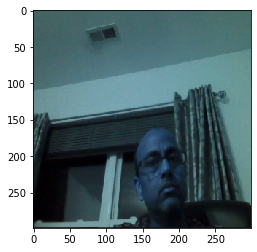

In [12]:
plt.imshow(image3.reshape(299,299,3)/255)

In [51]:
#import cv2